In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import learning_curve

<Figure size 640x480 with 0 Axes>

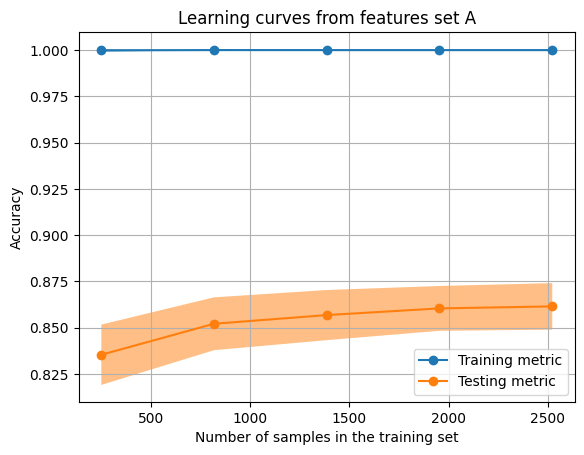

<Figure size 640x480 with 0 Axes>

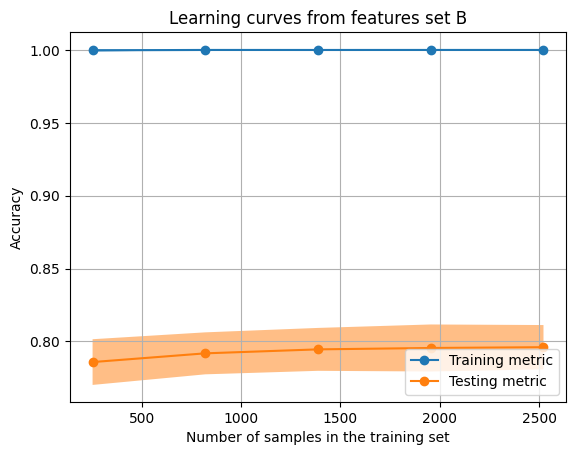

<Figure size 640x480 with 0 Axes>

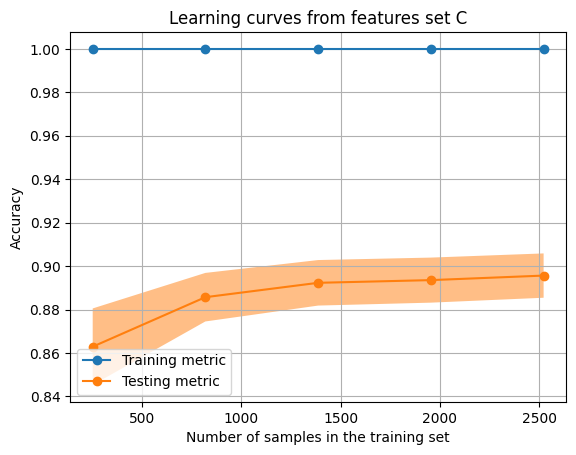

<Figure size 640x480 with 0 Axes>

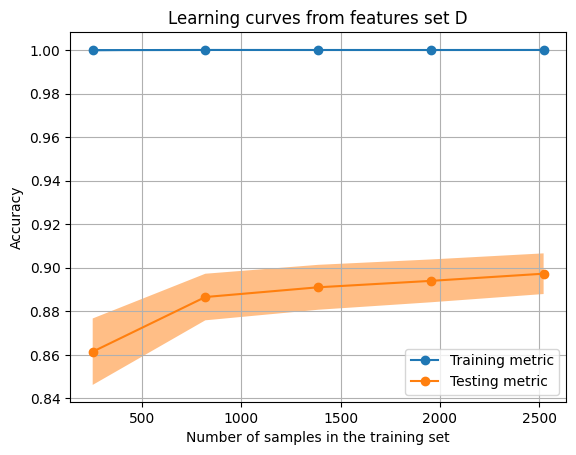

<Figure size 640x480 with 0 Axes>

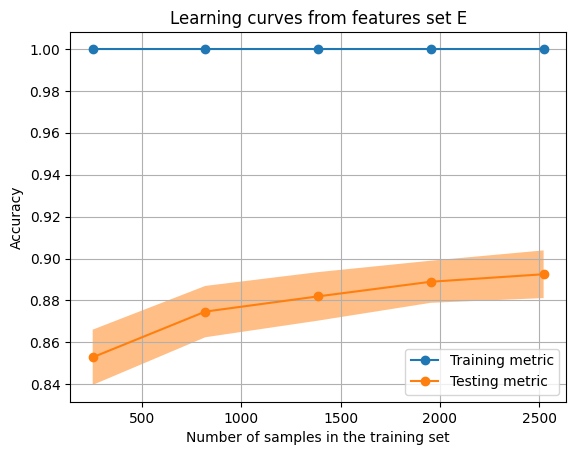

In [11]:
list_identifiers = ['A','B','C','D','E']
seed = 0
rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, n_jobs = -1, verbose = 1,random_state=seed)
for identifier in list_identifiers:
    data_path = 'feature_sets\FeaturesSet' + identifier + '.csv'
    df = pd.read_csv(data_path)
    X = df.drop(columns='Class')
    df['Class'].replace(['normal','abnormal'],[0,1], inplace=True)
    y = df['Class']
    common_params = {
        "X":X,
        "y":y,
        "train_sizes": np.linspace(0.1,1.0,5),
        "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=seed),
        "score_type":"both",
        "n_jobs":-1,
        "line_kw":{"marker":"o"},
        "std_display_style": "fill_between",
        "score_name": "Accuracy",
    }
    plt.figure()
    LearningCurveDisplay.from_estimator(rf, **common_params)
    plt.title('Learning curves from features set '+ identifier)
    plt.grid()
    plt.show()
    

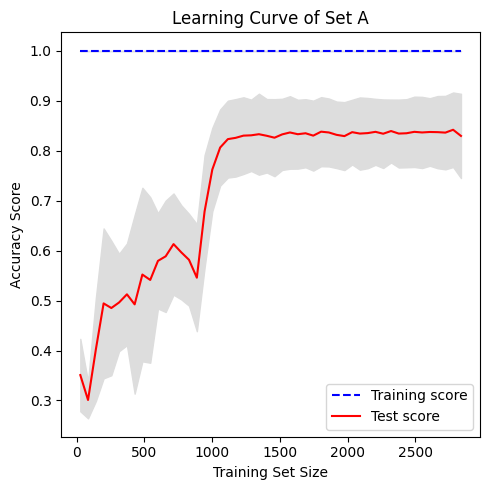

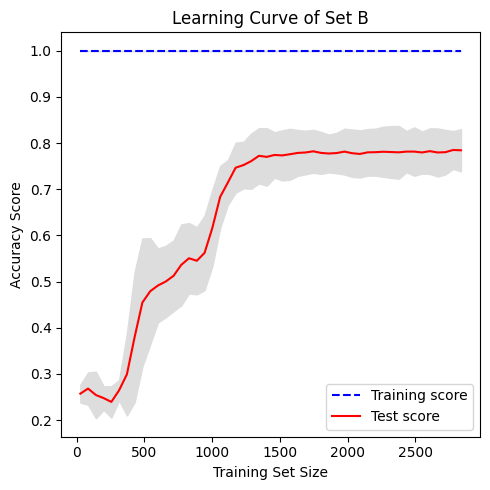

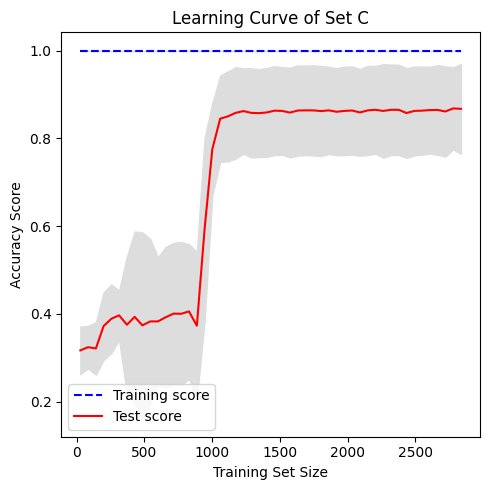

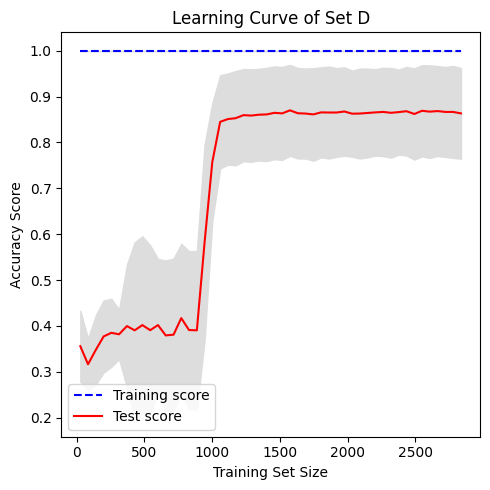

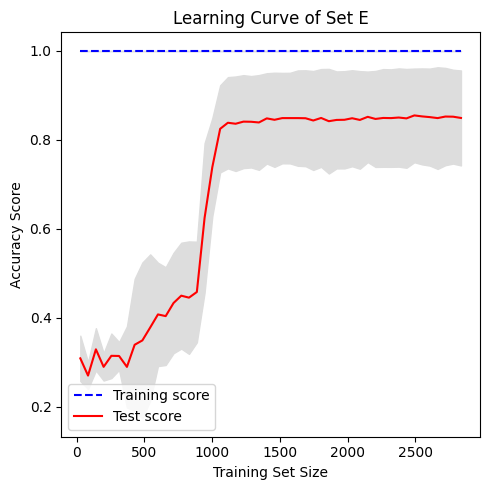

In [15]:
list_identifiers = ['A','B','C','D','E']
#seed = 0
#rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, n_jobs = -1, verbose = 1,random_state=seed)
for identifier in list_identifiers:
    data_path = 'feature_sets\FeaturesSet' + identifier + '.csv'
    df = pd.read_csv(data_path)
    X = df.drop(columns='Class')
    df['Class'].replace(['normal','abnormal'],[0,1], inplace=True)
    y = df['Class']
    common_params = {
        "X":X,
        "y":y,
        "train_sizes": np.linspace(0.01,1.0,50),
        "cv": 10,
        "n_jobs":-1,
        "scoring": "accuracy",
    }
    train_sizes, train_scores, test_scores = learning_curve(rf, **common_params)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.subplots(1, figsize=(5,5))
    plt.plot(train_sizes, train_mean, '--', color="blue", label="Training score")
    plt.plot(train_sizes, test_mean, '-', color="red", label="Test score")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color="#DDDDDD")
    plt.title("Learning Curve of Set "+ identifier)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


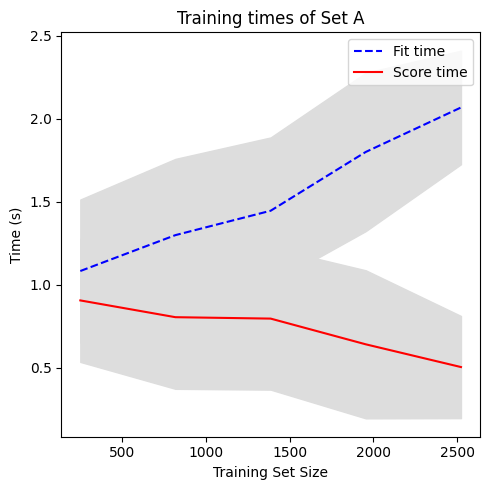

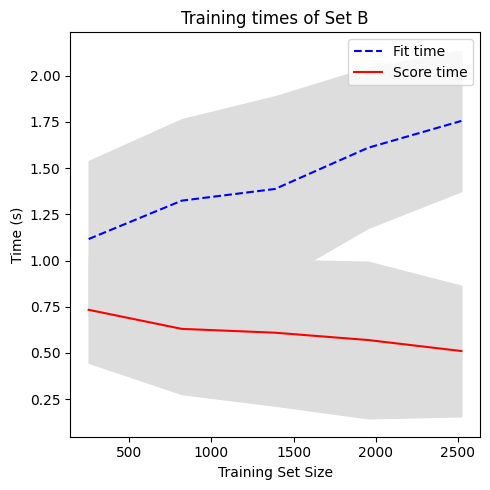

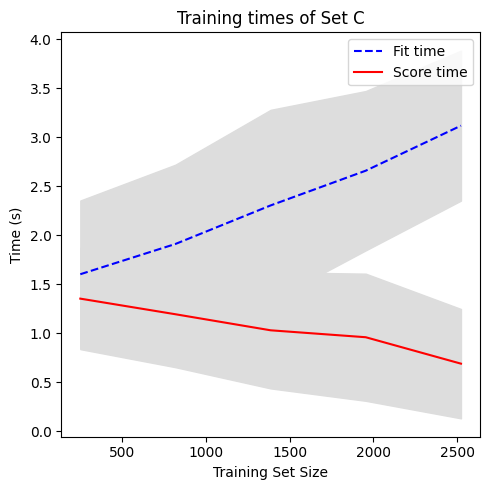

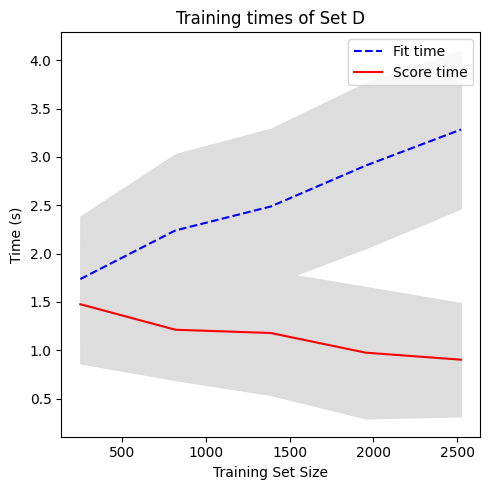

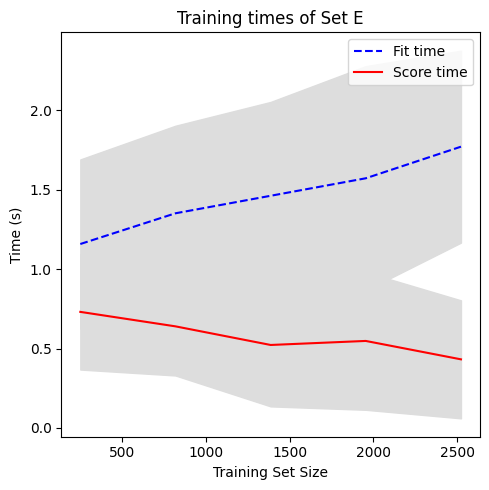

In [18]:
list_identifiers = ['A','B','C','D','E']
#seed = 0
#rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, n_jobs = -1, verbose = 1,random_state=seed)
for identifier in list_identifiers:
    data_path = 'feature_sets\FeaturesSet' + identifier + '.csv'
    df = pd.read_csv(data_path)
    X = df.drop(columns='Class')
    df['Class'].replace(['normal','abnormal'],[0,1], inplace=True)
    y = df['Class']
    common_params = {
        "X":X,
        "y":y,
        "train_sizes": np.linspace(0.1, 1.0, 5),
        "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
        "n_jobs":-1,
        "return_times": True,
    }
    train_sizes, _, test_scores, fit_times, score_times = learning_curve(rf, **common_params)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)
    plt.subplots(1, figsize=(5,5))
    plt.plot(train_sizes, fit_times_mean, '--', color="blue", label="Fit time")
    plt.plot(train_sizes, score_times_mean, '-', color="red", label="Score time")
    plt.fill_between(train_sizes, fit_times_mean-fit_times_std, fit_times_mean+fit_times_std, color="#DDDDDD")
    plt.fill_between(train_sizes, score_times_mean-score_times_std, score_times_mean+score_times_std, color="#DDDDDD")
    plt.title("Training times of Set "+ identifier)
    plt.xlabel("Training Set Size"), plt.ylabel("Time (s)")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()